# ENADE 2017 - Computação@Nordeste

Dados do curso de Bacharelado em Ciência da Computação das Universidades/Faculdades da Região Nordeste

**Como é calculada a nota do ENADE?**

Para calcular a nota do ENADE, são tiradas separadamente as médias das notas dos estudantes na prova de Formação Geral e na de Componente Específico. Em seguida, é calculada uma média ponderada entre esses dois valores, sendo atribuído peso 1 ao primeiro e 3 ao segundo.

As médias obtidas pelos alunos são então padronizadas, de acordo com a média brasileira e o desvio padrão, em conceitos que vão de 1 a 5. Sendo atribuído o conceito 3 aos cursos que estão na média ou próximos a ela, 1 e 2 aos que estão abaixo e 4 e 5 aos que estão acima.

Dessa forma, **a nota do ENADE é sempre um valor relativo**, ou seja, aponta para uma **comparação entre o curso da instituição de ensino superior observada e os cursos restantes daquela área no país**

### Carregando as bibliotecas necessárias

In [1]:
# Biblioteca científica
import numpy as np
# Biblioteca para análise de dados
import pandas as pd
# Suprimindo os warnings da biblioteca pandas
pd.options.mode.chained_assignment = None
# Bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Carregando e verificando os dados

In [2]:
# Dados do Exame Nacional de Desempenho dos Estudantes - 2017 (Curso de computação do nordeste)
df = pd.read_csv('dados/enade2017_ccc_ne_prep.csv')

In [3]:
# Exibindo o cabeçalho do dataframe
df.head()

,CO_IES,Instituicao,CO_CATEGAD,CO_CURSO,NO_CURSO,Municipio,UF,TP_SEXO,NU_IDADE,QE_I01,...,QE_I18,QE_I19,QE_I20,QE_I21,QE_I22,QE_I23,QE_I24,QE_I25,QE_I26,NT_GER
0,548,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),1,11452,CIÊNCIA DA COMPUTAÇÃO,São Luís,MA,M,27,A,...,A,A,C,A,A,D,A,E,A,45.2
1,548,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),1,11452,CIÊNCIA DA COMPUTAÇÃO,São Luís,MA,F,22,A,...,B,F,K,A,B,B,A,H,F,48.4
2,548,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),1,11452,CIÊNCIA DA COMPUTAÇÃO,São Luís,MA,M,27,A,...,A,A,B,A,A,A,E,H,I,55.5
3,548,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),1,11452,CIÊNCIA DA COMPUTAÇÃO,São Luís,MA,M,32,A,...,A,B,A,A,A,A,A,E,A,23.5
4,548,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),1,11452,CIÊNCIA DA COMPUTAÇÃO,São Luís,MA,M,25,A,...,A,B,G,A,C,E,E,E,F,54.3


In [4]:
# Tamanho do dataframe
print('O dataframe é composto por', df.shape[0], 'linhas e', df.shape[1], 'colunas')

O dataframe é composto por 1559 linhas e 34 colunas


In [5]:
# Exibindo as informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 34 columns):
CO_IES         1559 non-null int64
Instituicao    1559 non-null object
CO_CATEGAD     1559 non-null int64
CO_CURSO       1559 non-null int64
NO_CURSO       1559 non-null object
Municipio      1559 non-null object
UF             1559 non-null object
TP_SEXO        1559 non-null object
NU_IDADE       1559 non-null int64
QE_I01         1559 non-null object
QE_I02         1559 non-null object
QE_I04         1559 non-null object
QE_I05         1559 non-null object
QE_I06         1559 non-null object
QE_I07         1559 non-null object
QE_I08         1559 non-null object
QE_I09         1559 non-null object
QE_I10         1559 non-null object
QE_I11         1559 non-null object
QE_I12         1559 non-null object
QE_I13         1559 non-null object
QE_I14         1559 non-null object
QE_I15         1559 non-null object
QE_I17         1559 non-null object
QE_I18         1559 non-null obje

In [6]:
# Descrevendo as variáveis numéricas
desc_int = df.drop(['CO_IES', 'CO_CURSO'], axis=1).describe(include=[np.number])
desc_int.loc['count'] = desc_int.loc['count'].astype(int).astype(str)
desc_int.iloc[1:] = desc_int.iloc[1:].applymap('{:.0f}'.format)
desc_int.T

,count,mean,std,min,25%,50%,75%,max
CO_CATEGAD,1559,2,2,1,1,2,4,7
NU_IDADE,1559,25,4,20,22,24,27,55
NT_GER,1559,45,13,0,35,44,53,94


In [7]:
# Descrevendo as variáveis categóricas
cat_obj = df.drop(['Instituicao', 'Municipio', 'UF', 'NO_CURSO'], axis=1).describe(include=[np.object])
cat_obj.T

,count,unique,top,freq
TP_SEXO,1559,2,M,1367
QE_I01,1559,4,A,1365
QE_I02,1559,6,D,686
QE_I04,1559,6,D,612
QE_I05,1559,6,D,579
QE_I06,1559,6,B,1143
QE_I07,1559,8,D,422
QE_I08,1559,7,B,384
QE_I09,1559,6,C,521
QE_I10,1559,5,A,738


## Análise exploratória dos dados

In [8]:
# Quantidade de respostas do ENADE por IES
pd.DataFrame(df.groupby('Instituicao')['CO_IES'].count()).sort_values(by='CO_IES', ascending=False)

,CO_IES
Instituicao,
UNIVERSIDADE FEDERAL DE PERNAMBUCO (UFPE),113
FACULDADE PITÁGORAS DE SÃO LUIZ,76
UNIVERSIDADE FEDERAL DE ALAGOAS (UFAL),70
UNIVERSIDADE FEDERAL DA BAHIA (UFBA),67
UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),67
UNIVERSIDADE FEDERAL RURAL DE PERNAMBUCO (UFRPE),66
UNIVERSIDADE ESTADUAL DO CEARÁ (UECE),65
UNIVERSIDADE DE FORTALEZA (UNIFOR),63
FACULDADE DE CIÊNCIAS APLICADAS E SOCIAIS DE PETROLINA (FACAPE),63


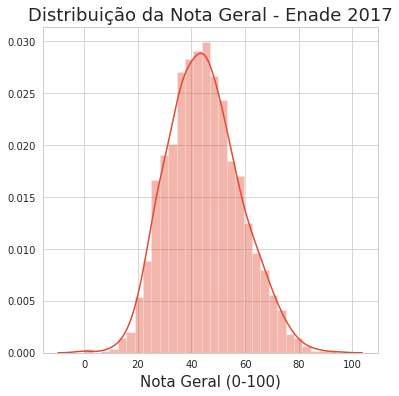

In [9]:
# Variável alvo NT_GER (Nota geral)

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(6,6))

# Gerando a figura
ax = sns.distplot(df['NT_GER'], kde=True)

# Definindo o título da figura
ax.set_title('Distribuição da Nota Geral - Enade 2017', fontsize=18)

# Definindo o nome do eixo horizontal
ax.set_xlabel('Nota Geral (0-100)', fontsize=15)

# Exibindo a figura sem mensagem de retorno
plt.show()

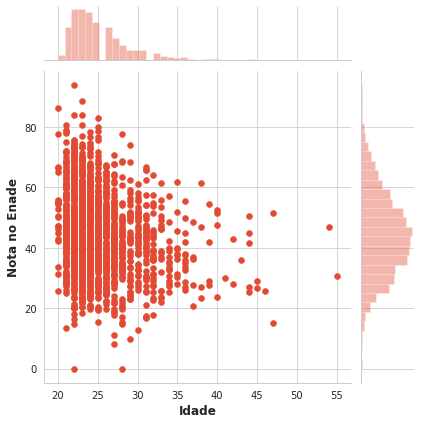

In [10]:
# Idade do estudante vs a Nota geral obtida

# Gerando a figura
fig = sns.jointplot(x='NU_IDADE',y='NT_GER',data=df)

# Definindo o nome do eixo horizontal
fig.ax_joint.set_xlabel('Idade', fontweight='bold')

# Definindo o nome do eixo vertical
fig.ax_joint.set_ylabel('Nota no Enade', fontweight='bold')


# Exibindo a figura sem mensagem de retorno
plt.show()

Como podemos verificar na visualização acima, os alunos com idade entre 20 e 25 anos obtiveram nota melhor na prova do Enade.

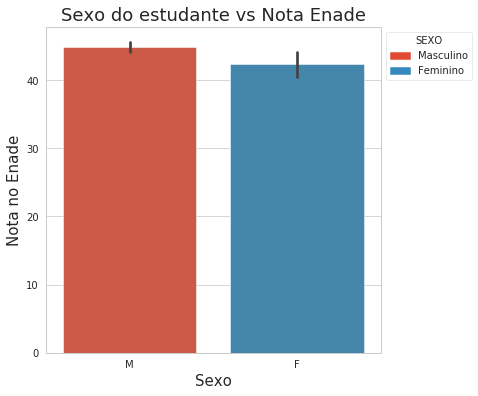

In [11]:
# Sexo x Nota geral

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(6,6))

#Gerando a figura
sns.barplot(x='TP_SEXO',y='NT_GER',data=df)

# Definindo o título da figura
ax.set_title('Sexo do estudante vs Nota Enade', fontsize=18)

# Definindo o nome do eixo horizontal
ax.set_xlabel('Sexo', fontsize=15)

# Definindo o nome do eixo vertical
ax.set_ylabel('Nota no Enade', fontsize=15)

# Definindo a legenda manualmente
l1 = mpatches.Patch(color='C0',label='Masculino')
l2 = mpatches.Patch(color='C1',label='Feminino')
plt.legend(handles=[l1,l2], title='SEXO', bbox_to_anchor=(1, 1))

plt.show()

Na visualização acima percebemos que a diferença entre a média das notas por sexo não é significativa.

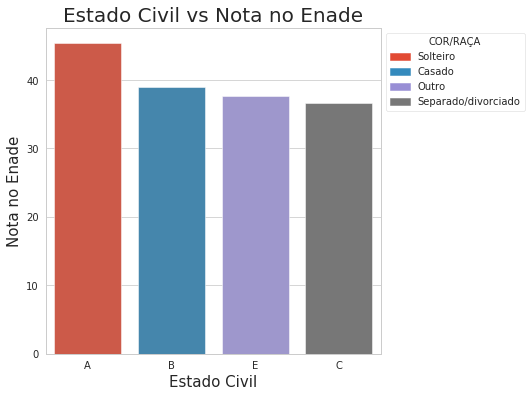

In [12]:
# Estado Civil x Nota geral

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(6,6))

# Ordenando as colunas
order_q01 = pd.DataFrame(df.groupby('QE_I01')['NT_GER'].mean()).reset_index(
        ).sort_values(by='NT_GER', ascending=False)['QE_I01'].values

# Gerando a figura
ax = sns.barplot(x='QE_I01',y='NT_GER', data=df, order=order_q01, ci=None)

# Definindo o título da figura
ax.set_title('Estado Civil vs Nota no Enade', fontsize=20)

# Definindo o nome do eixo horizontal
ax.set_xlabel('Estado Civil', fontsize=15)

# Definindo o nome do eixo vertical
ax.set_ylabel('Nota no Enade', fontsize=15)

# Definindo a legenda manualmente
l1 = mpatches.Patch(color='C0',label='Solteiro')
l2 = mpatches.Patch(color='C1',label='Casado')
l3 = mpatches.Patch(color='C2',label='Outro')
l4 = mpatches.Patch(color='C3',label='Separado/divorciado')
plt.legend(handles=[l1,l2,l3,l4], title='COR/RAÇA', bbox_to_anchor=(1, 1))

# Exibindo a figura sem mensagem de retorno
plt.show()

O estado civil parece influenciar na média das notas na prova.

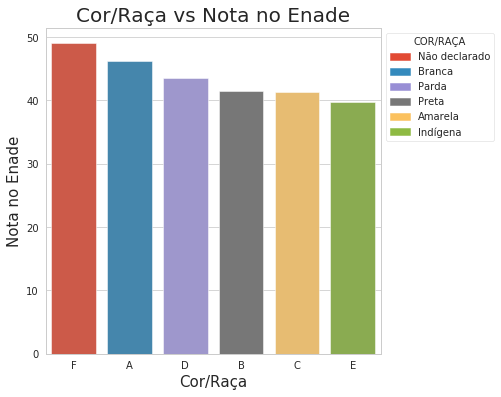

In [13]:
# Cor/Raça x Nota geral

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(6,6))

# Ordenando as colunas
order_q02 = pd.DataFrame(df.groupby('QE_I02')['NT_GER'].mean()).reset_index(
        ).sort_values(by='NT_GER', ascending=False)['QE_I02'].values

# Gerando a figura
ax = sns.barplot(x='QE_I02',y='NT_GER',data=df, order=order_q02, ci=None)

# Definindo o título da figura
ax.set_title('Cor/Raça vs Nota no Enade', fontsize=20)

# Definindo o nome do eixo horizontal
ax.set_xlabel('Cor/Raça', fontsize=15)

# Definindo o nome do eixo vertical
ax.set_ylabel('Nota no Enade', fontsize=15)

# Definindo a legenda manualmente
l1 = mpatches.Patch(color='C0',label='Não declarado')
l2 = mpatches.Patch(color='C1',label='Branca')
l3 = mpatches.Patch(color='C2',label='Parda')
l4 = mpatches.Patch(color='C3',label='Preta')
l5 = mpatches.Patch(color='C4',label='Amarela')
l6 = mpatches.Patch(color='C5',label='Indígena')
plt.legend(handles=[l1,l2,l3,l4,l5,l6], title='COR/RAÇA', bbox_to_anchor=(1, 1))

# Exibindo a figura sem mensagem de retorno
plt.show()

A cor/raça parece influenciar na média das notas na prova.

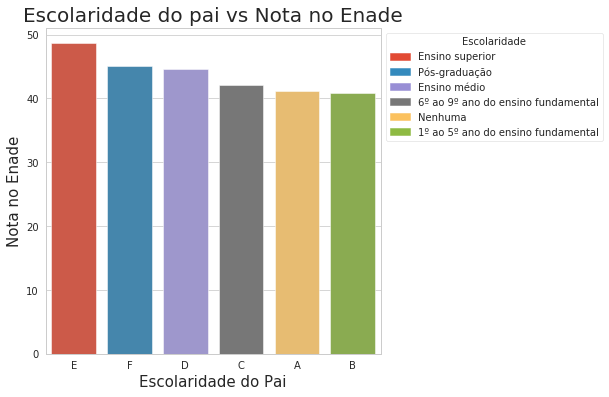

In [14]:
# Escolaridade do pai x Nota geral

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(6,6))

# Ordenando as colunas
order_q04 = pd.DataFrame(df.groupby('QE_I04')['NT_GER'].mean()).reset_index(
            ).sort_values(by='NT_GER', ascending=False)['QE_I04'].values

# Gerando a figura
ax = sns.barplot(x='QE_I04',y='NT_GER',data=df, order=order_q04, ci=None)

# Definindo o título da figura
ax.set_title('Escolaridade do pai vs Nota no Enade', fontsize=20)

# Definindo o nome do eixo horizontal
ax.set_xlabel('Escolaridade do Pai', fontsize=15)

# Definindo o nome do eixo vertical
ax.set_ylabel('Nota no Enade', fontsize=15)

# Definindo a legenda manualmente
l1 = mpatches.Patch(color='C0',label='Ensino superior')
l2 = mpatches.Patch(color='C1',label='Pós-graduação')
l3 = mpatches.Patch(color='C2',label='Ensino médio')
l4 = mpatches.Patch(color='C3',label='6º ao 9º ano do ensino fundamental')
l5 = mpatches.Patch(color='C4',label='Nenhuma')
l6 = mpatches.Patch(color='C5',label='1º ao 5º ano do ensino fundamental')
plt.legend(handles=[l1,l2,l3,l4,l5,l6], title='Escolaridade', bbox_to_anchor=(1, 1))

# Exibindo a figura sem mensagem de retorno
plt.show()

O nível de escolaridade do pai parece influenciar na nota dos estudantes no Enade.

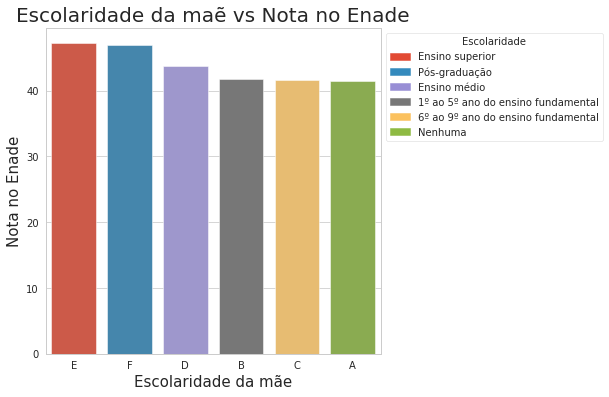

In [15]:
# Escolaridade da mãe x Nota geral

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(6,6))

# Ordenando as colunas
order_q05 = pd.DataFrame(df.groupby('QE_I05')['NT_GER'].mean()).reset_index(
            ).sort_values(by='NT_GER', ascending=False)['QE_I05'].values

# Gerando a figura
ax = sns.barplot(x='QE_I05',y='NT_GER',data=df, order=order_q05, ci=None)

# Definindo o título da figura
ax.set_title('Escolaridade da maẽ vs Nota no Enade', fontsize=20)

# Definindo o nome do eixo horizontal
ax.set_xlabel('Escolaridade da mãe', fontsize=15)

# Definindo o nome do eixo vertical
ax.set_ylabel('Nota no Enade', fontsize=15)

# Definindo a legenda manualmente
l1 = mpatches.Patch(color='C0',label='Ensino superior')
l2 = mpatches.Patch(color='C1',label='Pós-graduação')
l3 = mpatches.Patch(color='C2',label='Ensino médio')
l4 = mpatches.Patch(color='C3',label='1º ao 5º ano do ensino fundamental')
l5 = mpatches.Patch(color='C4',label='6º ao 9º ano do ensino fundamental')
l6 = mpatches.Patch(color='C5',label='Nenhuma')
plt.legend(handles=[l1,l2,l3,l4,l5,l6], title='Escolaridade', bbox_to_anchor=(1, 1))

# Exibindo a figura sem mensagem de retorno
plt.show()

O nível de escolaridade da maẽ parece influenciar na nota dos estudantes no Enade.

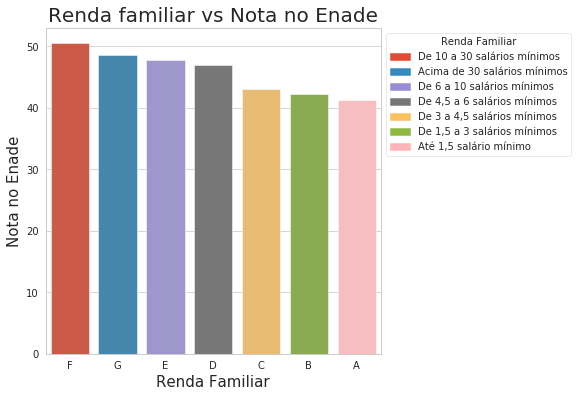

In [16]:
# Renda familiar vs nota no Enade

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(6,6))


# Ordenando as colunas
order_q08 = pd.DataFrame(df.groupby('QE_I08')['NT_GER'].mean()).reset_index(
            ).sort_values(by='NT_GER', ascending=False)['QE_I08'].values

# Gerando a figura
ax = sns.barplot(x='QE_I08',y='NT_GER',data=df, order=order_q08, ci=None)

# Definindo o título da figura
ax.set_title('Renda familiar vs Nota no Enade', fontsize=20)

# Definindo o nome do eixo horizontal
ax.set_xlabel('Renda Familiar', fontsize=15)

# Definindo o nome do eixo vertical
ax.set_ylabel('Nota no Enade', fontsize=15)

# Definindo a legenda manualmente
l1 = mpatches.Patch(color='C0',label='De 10 a 30 salários mínimos')
l2 = mpatches.Patch(color='C1',label='Acima de 30 salários mínimos')
l3 = mpatches.Patch(color='C2',label='De 6 a 10 salários mínimos')
l4 = mpatches.Patch(color='C3',label='De 4,5 a 6 salários mínimos')
l5 = mpatches.Patch(color='C4',label='De 3 a 4,5 salários mínimos')
l6 = mpatches.Patch(color='C5',label='De 1,5 a 3 salários mínimos')
l7 = mpatches.Patch(color='C6',label='Até 1,5 salário mínimo')
plt.legend(handles=[l1,l2,l3,l4,l5,l6,l7], title='Renda Familiar', bbox_to_anchor=(1, 1))

# Exibindo a figura sem mensagem de retorno
plt.show()

Quanto maior a renda da familia dos estudantes, melhor a média das notas no Enade 2017. 

Assim como visto acima outras variáveis, presente nos dados, podem ser analisadas e verificadas a sua relevância em relação a nota geral do estudante de computação das universidade/faculdades do nordeste no Enade 2017

### Preparação dos dados para a Regressão Linear

Alguns atributos dos dados não serão utilizados para a contrução dos modelos e serão removidos:

**CO_IES** -> Código da instituição

**Instituição** -> Nome da Instituição

**CO_CURSO** -> Código do curso

**NO_CURSO** -> Nome do curso

**Município** -> Nome do município onde da sede da IES

**UF** -> Sigla do estado da IES

In [17]:
#### Selecionando as variáveis que serão utilizadas para a contrução do modelo
df_model = df[['CO_CATEGAD', 'TP_SEXO', 'NU_IDADE', 'QE_I01', 'QE_I02', 'QE_I04', 'QE_I05',
               'QE_I06', 'QE_I07', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11', 'QE_I12', 'QE_I13', 
               'QE_I14', 'QE_I15', 'QE_I17', 'QE_I18', 'QE_I19', 'QE_I20', 'QE_I21', 'QE_I22', 
               'QE_I23', 'QE_I24', 'QE_I25', 'QE_I26', 'NT_GER']]

#### Convertendo recursos categóricos

A biblioteca do scikit trabalha exclusivamente com atributos numéricos. Logo, é necessário transformar os campos categóricos em variáveis dummy (a variável dummy é uma variável categegórica transformada em numérica). Caso contrário, nosso algoritmo não aceitará esses atributos diretamente como entradas.

In [18]:
# Listando as colunas com variáveis categóricas
df_model.dtypes[df.dtypes == "object"].index

Index(['TP_SEXO', 'QE_I01', 'QE_I02', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I07',
       'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11', 'QE_I12', 'QE_I13', 'QE_I14',
       'QE_I15', 'QE_I17', 'QE_I18', 'QE_I19', 'QE_I20', 'QE_I21', 'QE_I22',
       'QE_I23', 'QE_I24', 'QE_I25', 'QE_I26'],
      dtype='object')

In [19]:
# Variáveis categóricas que serão utilizadas como preditores
categoricas_df = pd.get_dummies(df_model[['TP_SEXO', 'QE_I01', 'QE_I02', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I07',
                                          'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11', 'QE_I12', 'QE_I13', 'QE_I14',
                                          'QE_I15', 'QE_I17', 'QE_I18', 'QE_I19', 'QE_I20', 'QE_I21', 'QE_I22',
                                          'QE_I23', 'QE_I24', 'QE_I25', 'QE_I26']], drop_first=True)

In [20]:
# Criando o dataset de treino após o pré-processamento
# Removendo os atributos numéricos do dataset
temp = df_model.drop(['TP_SEXO', 'QE_I01', 'QE_I02', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I07',
                      'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11', 'QE_I12', 'QE_I13', 'QE_I14',
                      'QE_I15', 'QE_I17', 'QE_I18', 'QE_I19', 'QE_I20', 'QE_I21', 'QE_I22',
                      'QE_I23', 'QE_I24', 'QE_I25', 'QE_I26'], axis=1)
# Criando novo dataset com as variáveis numéricas e as variáveis dummy
df_model = pd.concat([temp,categoricas_df],axis=1)

## Treinando um modelo de regressão linear

Vamos agora começar a treinar o modelo de regressão. Precisamos primeiro dividir nossos dados em uma matriz X que contém os recursos para treinar, e uma matriz y com a variável alvo, neste caso, a coluna NT_GER (Nota Geral no ENADE 2017). 

In [21]:
# Serão utilizada nesse modelo, para fins didáticos, todas as variáveis selecionadas
# Separando as variáveis preditoras e alvo
# Variáveis preditoras
X = df_model.drop(['NT_GER'], axis=1)
# Variável alvo
y = df_model['NT_GER']

#### Split de treino/teste

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos criar o modelo usando o conjunto de treinamento e depois usar o conjunto de testes para avaliar o modelo.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#### Criando e treinando o modelo

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()

In [26]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Intercept e coeficientes

In [27]:
# Exibindo a intercepção
print(lm.intercept_)

49.11762577055147


In [28]:
# Exibindo os coeficientes
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
# 10 primeiros coeficientes
coeff_df.sort_values(by='Coefficient', ascending=False).head(10)

,Coefficient
QE_I17_C,20.137597
QE_I20_I,13.824214
QE_I06_E,11.795059
QE_I06_F,8.740453
QE_I17_F,7.492190
QE_I11_C,7.048568
QE_I13_E,6.918060
QE_I09_F,6.557507
QE_I11_G,6.231879
QE_I14_F,5.596505


### Predições do modelo

In [29]:
predictions = lm.predict(X_test)

### Metricas de avaliação da regressão

**Root Mean Square Error** (raiz do erro quadrático médio) (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


**Coeficiente de Determinação**, também chamado de R², é uma medida de ajustamento de um modelo estatístico linear generalizado, como a regressão linear, em relação aos valores observados. O R² varia entre 0 e 1, indicando, em percentagem, o quanto o modelo consegue explicar os valores observados. Quanto maior o R², mais explicativo é o modelo, melhor ele se ajusta à amostra.

$$R^2=1-\frac{\sum_{i=1}^n (y_i -\hat{y_i})^2}{\sum_{i=1}^n (y_i-\bar{y})^2}$$

onde:

- ${n}$ é o número de observações
- ${y_i}$ é o valor observado
- $\bar{y}$ é a média das observações
- $\hat{y_i}$ é o valor estimado (previsão) de $y_i$

In [30]:
# Importando as métricas
from sklearn import metrics

In [31]:
# Computando o RMSE (Root Mean Square Error)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 10.867991080569977


In [32]:
# Coeficiente de determinação (R²)
print('R²:', metrics.r2_score(y_test, predictions))

R²: 0.2228766777215826


#### Visualizações

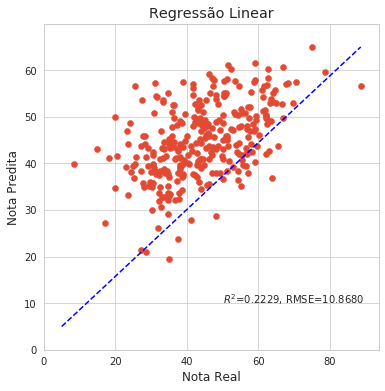

In [33]:
# Visualizando a predição do modelo
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_test, predictions)
ax.plot([5, y_test.max()], [5, predictions.max()], '--k', c='blue')
ax.set_ylabel('Nota Predita')
ax.set_xlabel('Nota Real')
ax.set_title('Regressão Linear')
ax.text(50, 10, r'$R^2$=%.4f, RMSE=%.4f' % (
    metrics.r2_score(y_test, predictions), np.sqrt(metrics.mean_squared_error(y_test, predictions))))
ax.set_xlim([0,  y_test.max()+5])
ax.set_ylim([0, predictions.max()+5])
plt.show()

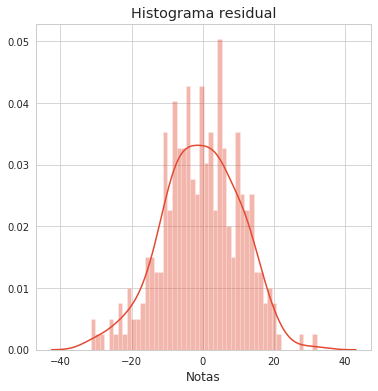

In [34]:
### Histograma residual
fig, ax = plt.subplots(figsize=(6, 6))
sns.distplot((y_test - predictions), bins=50)
ax.set_title('Histograma residual')
ax.set_xlabel('Notas')
plt.show()

### Conclusão

In [35]:
# Intercept
print(lm.intercept_)

49.11762577055147


In [36]:
# Coeficientes
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
# 10 primeiros coeficientes
coeff_df.sort_values(by='Coefficient', ascending=False).head(10)

,Coefficient
QE_I17_C,20.137597
QE_I20_I,13.824214
QE_I06_E,11.795059
QE_I06_F,8.740453
QE_I17_F,7.492190
QE_I11_C,7.048568
QE_I13_E,6.918060
QE_I09_F,6.557507
QE_I11_G,6.231879
QE_I14_F,5.596505


Interpretando os coeficientes:

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade na VariavelX está associado a um aumento de Y na nota geral do estudante.